<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 2</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm NN</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [178]:
from collections import deque
import random
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from operator import itemgetter

Kolejne litery alfabetu będą reprezentowały losowe wierzchołki o współrzędnych ze zbioru [-100,100] x [0,50] x [-100,100]


In [179]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [180]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [181]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [0, 50], zRange = [-100,100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        z = random.randint(zRange[0], zRange[1])
        points[alphabet[i]] = [x,y,z]
    return points


Losujemy n wierzchołków


In [182]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(11) # n = 11
graph, points = all

In [183]:
for point, coords in points.items():
   x, y, z = coords
   print(f"{point}: ({x}, {y}, {z})")

A: (59, 8, -90)
B: (92, 43, -30)
C: (58, 44, 2)
D: (59, 19, -66)
E: (45, 39, 60)
F: (-29, 29, 100)
G: (-76, 45, 19)
H: (-82, 13, 5)
I: (13, 13, -15)
J: (50, 10, 100)
K: (69, 24, -9)


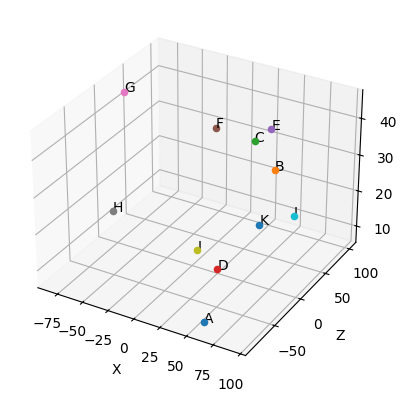

{'A': [59, 8, -90],
 'B': [92, 43, -30],
 'C': [58, 44, 2],
 'D': [59, 19, -66],
 'E': [45, 39, 60],
 'F': [-29, 29, 100],
 'G': [-76, 45, 19],
 'H': [-82, 13, 5],
 'I': [13, 13, -15],
 'J': [50, 10, 100],
 'K': [69, 24, -9]}

In [184]:
def plot3D(points):
    labels = points.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)


    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()

plot3D(points)
points

In [185]:
display(Markdown(r"Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem"))
display(Markdown(r"$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$"))


Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem

$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$

In [186]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2+(P[2]-Q[2])**2)**(1/2)

#przykład
print(distance(points["A"],points["C"]))

98.79777325425913


Odległości między wierzchołkami możemy przechowywać w słowniku krawędzi

In [187]:
def distances(points):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)
distances_dict

{('A', 'B'): 76.90253571892151,
 ('A', 'C'): 98.79777325425913,
 ('A', 'D'): 26.40075756488817,
 ('A', 'E'): 153.8083222715858,
 ('A', 'F'): 210.440015206234,
 ('A', 'G'): 177.4119499921017,
 ('A', 'H'): 170.09115203325538,
 ('A', 'I'): 88.12491134747314,
 ('A', 'J'): 190.22355269524328,
 ('A', 'K'): 83.16850365372699,
 ('B', 'A'): 76.90253571892151,
 ('B', 'C'): 46.70117771534247,
 ('B', 'D'): 54.415071441651165,
 ('B', 'E'): 101.61200716450787,
 ('B', 'F'): 178.1488141975691,
 ('B', 'G'): 175.0114281982751,
 ('B', 'H'): 180.00277775634464,
 ('B', 'I'): 85.82540416450132,
 ('B', 'J'): 140.54536634126364,
 ('B', 'K'): 36.4828726939094,
 ('C', 'A'): 98.79777325425913,
 ('C', 'B'): 46.70117771534247,
 ('C', 'D'): 72.4568837309472,
 ('C', 'E'): 59.648973168026956,
 ('C', 'F'): 131.90147838443661,
 ('C', 'G'): 135.0777553855556,
 ('C', 'H'): 143.42245291445826,
 ('C', 'I'): 57.227615711297986,
 ('C', 'J'): 104.03845442911962,
 ('C', 'K'): 25.337718918639855,
 ('D', 'A'): 26.40075756488817,

Funkcja sumująca odległość na całej ścieżce.

In [188]:
def get_path_length(path, dist_dict):
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

#przykład
samplePath = ["A", "D", "C", "B"]
print(samplePath, " ---> ", get_path_length(samplePath, distances_dict))



['A', 'D', 'C', 'B']  --->  145.55881901117783


In [189]:
def edges(dist_dict):
    graph = {}
    for edge in dist_dict:
        node1, node2 = edge
        if node1 not in graph:
            graph[node1] = [node2]
        else:
            graph[node1].append(node2)
    return graph

graph = edges(distances_dict)
graph

{'A': ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'B': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K'],
 'F': ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K'],
 'G': ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K'],
 'I': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K'],
 'K': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}

1. Algorytm zachłanny - znajdowanie ścieżki poszukując najbliższego (nieodwiedzonego) sąsiada.

In [190]:
def nearest_neighbour(graph, dist_dict, starter_node):
    node = starter_node
    path = []
    full_distance = 0
    while len(path) < len(graph):
        path.append(node)
        if(len(path) == len(graph)):
            break
        distance = float('inf')
        next_node = ''
        for neighbour in graph[node]:
            min_dist = dist_dict[(node, neighbour)]
            if neighbour not in path and min_dist < distance:
                distance = min_dist
                next_node = neighbour
        full_distance += distance
        print("nearest unvisited neighbour to", node, "-->", next_node, ". edge distance",
              "(",node,",", next_node,") = ", distance, ", full distance : ", full_distance)
        node = next_node
    dist_to_starter_node = dist_dict[(next_node, starter_node)]
    full_distance += dist_to_starter_node
    print("Going to the start point", "(",next_node,",", starter_node,") = ", dist_to_starter_node, ", full distance : ", full_distance)
    path.append(starter_node)
    return (path, full_distance)
            

NN = nearest_neighbour(graph,distances_dict, 'A')
NN


nearest unvisited neighbour to A --> D . edge distance ( A , D ) =  26.40075756488817 , full distance :  26.40075756488817
nearest unvisited neighbour to D --> B . edge distance ( D , B ) =  54.415071441651165 , full distance :  80.81582900653933
nearest unvisited neighbour to B --> K . edge distance ( B , K ) =  36.4828726939094 , full distance :  117.29870170044873
nearest unvisited neighbour to K --> C . edge distance ( K , C ) =  25.337718918639855 , full distance :  142.6364206190886
nearest unvisited neighbour to C --> I . edge distance ( C , I ) =  57.227615711297986 , full distance :  199.86403633038657
nearest unvisited neighbour to I --> E . edge distance ( I , E ) =  85.58621384311844 , full distance :  285.450250173505
nearest unvisited neighbour to E --> J . edge distance ( E , J ) =  49.658836071740545 , full distance :  335.1090862452456
nearest unvisited neighbour to J --> F . edge distance ( J , F ) =  81.25269226308751 , full distance :  416.3617785083331
nearest unvi

(['A', 'D', 'B', 'K', 'C', 'I', 'E', 'J', 'F', 'G', 'H', 'A'],
 716.8982838470362)

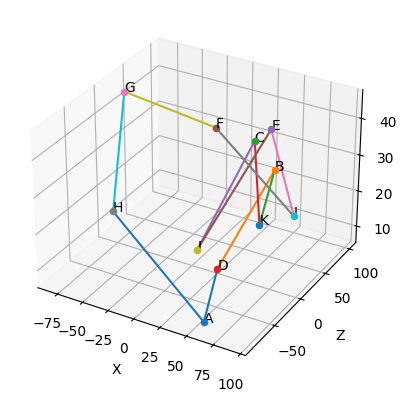

In [191]:
def plot3D_path(path, pointsp):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for i in range(len(path) - 1):
        point1 = path[i]
        point2 = path[i + 1]
        ax.plot([points[point1][0], points[point2][0]],
                [points[point1][2], points[point2][2]],
                [points[point1][1], points[point2][1]])
    plt.show()

plot3D_path(NN[0], points)
